<a href="https://colab.research.google.com/github/InsightMart/DSPL_project/blob/main/ML2_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [ ]:
# Load the training dataset
df = pd.read_csv("cleaned_train_data.csv").dropna(subset=['Customer_ID'])


In [ ]:
# Select features and target variable
features = ['luxury_sales', 'fresh_sales', 'dry_sales', 'Encoded_outlet_city']
target = 'cluster_catgeory'  # Assuming this is the actual customer segment

In [ ]:
# Standardize the features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

In [ ]:
# Split into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=42, stratify=df[target])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
X_train['cluster_kmeans'] = kmeans.fit_predict(X_train)
X_test['cluster_kmeans'] = kmeans.predict(X_test)

In [ ]:
# Generate Classification Report
print("Classification Report:\n", classification_report(y_test, X_test['cluster_kmeans']))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00     56695
           2       0.00      0.00      0.00     46519
           3       0.02      0.07      0.03     14672
           4       0.26      0.20      0.23     51732
           5       0.00      0.00      0.00     11862
           6       0.00      0.00      0.00     50765

    accuracy                           0.05    232245
   macro avg       0.04      0.04      0.04    232245
weighted avg       0.06      0.05      0.05    232245



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

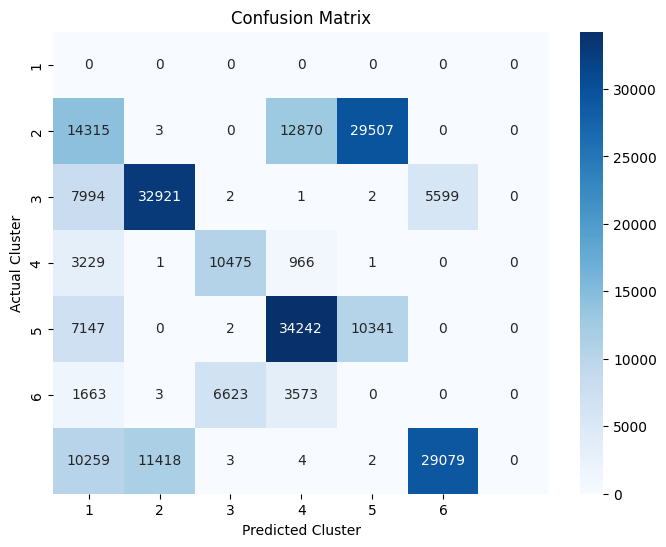

In [ ]:
# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, X_test['cluster_kmeans'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Cluster")
plt.ylabel("Actual Cluster")
plt.title("Confusion Matrix")
plt.show()

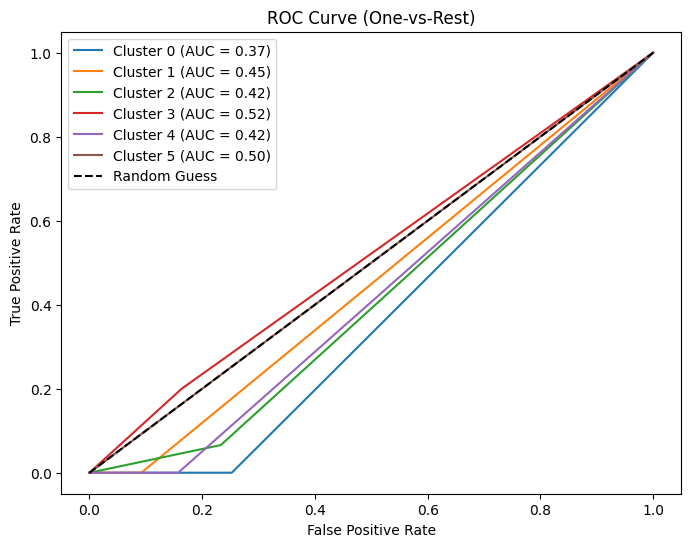

In [ ]:
# ROC Curve for Multi-Class Classification (One-vs-Rest)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_bin = label_binarize(X_test['cluster_kmeans'], classes=np.unique(y_test))

plt.figure(figsize=(8, 6))
for i in range(y_test_bin.shape[1]):  # Loop through each class
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Cluster {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (One-vs-Rest)")
plt.legend()
plt.show()
